In [1]:
import cv2


In [2]:
from deepface import DeepFace

# To recgonize the expression from an image

In [3]:
img=cv2.imread("happy boy.jpg")

In [4]:
import matplotlib.pyplot as plt

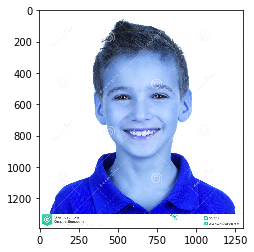

In [5]:
plt.imshow(img)

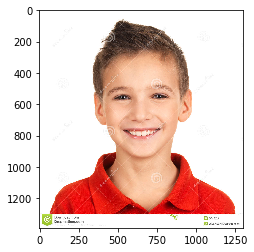

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
prediction =DeepFace.analyze(img)


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.49s/it]


In [8]:
prediction

{'emotion': {'angry': 4.194861320454366e-14,
  'disgust': 9.536293055691795e-19,
  'fear': 7.283770250524513e-14,
  'happy': 100.0,
  'sad': 7.319709074971037e-12,
  'surprise': 1.2050488712900438e-12,
  'neutral': 2.0170443093547874e-06},
 'dominant_emotion': 'happy',
 'region': {'x': 320, 'y': 293, 'w': 662, 'h': 662},
 'age': 20,
 'gender': 'Man',
 'race': {'asian': 0.06317862425930798,
  'indian': 0.42793313041329384,
  'black': 0.014695472782477736,
  'white': 61.509060859680176,
  'middle eastern': 21.44344598054886,
  'latino hispanic': 16.541688144207},
 'dominant_race': 'white'}

In [9]:
prediction["dominant_emotion"]

'happy'

In [10]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

In [11]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5)

for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (66, 50, 200), 6)

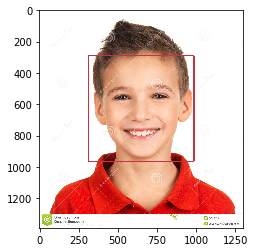

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [13]:
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,
            prediction["dominant_emotion"],
            (100,200),
            font,10,
            (0,0,255),
            10,
            cv2.LINE_4);


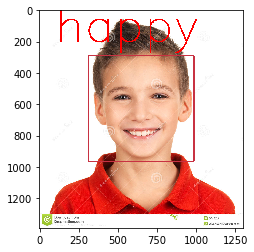

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
img=cv2.imread("sad girl.jpg")



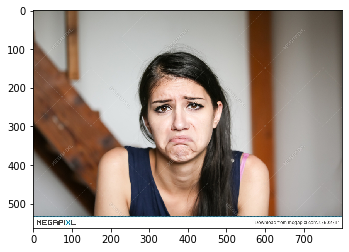

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [17]:
prediction =DeepFace.analyze(img)
prediction

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.50it/s]


{'emotion': {'angry': 0.06718785734847188,
  'disgust': 0.0028365575417410582,
  'fear': 53.82102131843567,
  'happy': 5.224366945999481e-11,
  'sad': 46.09994292259216,
  'surprise': 0.00027552216579351807,
  'neutral': 0.008740629709791392},
 'dominant_emotion': 'fear',
 'region': {'x': 275, 'y': 169, 'w': 210, 'h': 210},
 'age': 27,
 'gender': 'Woman',
 'race': {'asian': 4.3586064130067825,
  'indian': 9.990502893924713,
  'black': 0.6169685628265142,
  'white': 17.784586548805237,
  'middle eastern': 47.65068292617798,
  'latino hispanic': 19.59865242242813},
 'dominant_race': 'middle eastern'}

In [18]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5)

for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (66, 50, 200), 6)

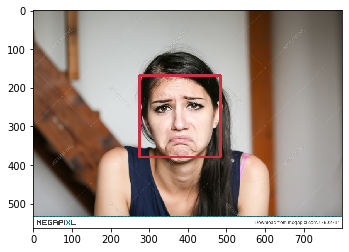

In [19]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

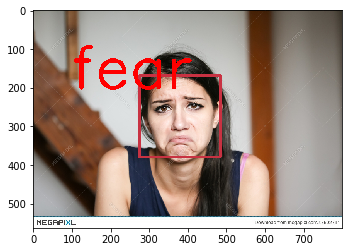

In [20]:
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,
            prediction["dominant_emotion"],
            (100,200),
            font,5,
            (0,0,255),
            10,
            cv2.LINE_4);
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# To recogize expression from a video...

In [21]:
import cv2
from deepface import DeepFace

In [22]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")


In [24]:
cap=cv2.VideoCapture(0)
"""if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")"""
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")
while True:
    ret,frame=cap.read()
    if frame is None:
        raise ValueError('Unable to get a frame!')
    print(frame)
    result= DeepFace.analyze(frame, actions=['emotion'] ,enforce_detection=False)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, scaleFactor =1.05, minNeighbors=5)
    for x, y, w, h in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (66, 50, 200), 6)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,
                result["dominant_emotion"],
                (10, 150),
                font, 5,
                (0, 0, 255),
                5,
                cv2.LINE_4);
    cv2.imshow("Original Video", frame)

    if cv2.waitKey(2) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[[19 20 24]
  [21 22 25]
  [21 22 25]
  ...
  [20 20 20]
  [19 20 20]
  [18 20 20]]

 [[19 20 23]
  [21 22 25]
  [21 22 25]
  ...
  [20 20 20]
  [19 20 20]
  [18 20 20]]

 [[20 21 24]
  [21 22 25]
  [21 23 24]
  ...
  [22 22 22]
  [20 21 21]
  [18 20 20]]

 ...

 [[22 22 28]
  [21 22 27]
  [19 20 24]
  ...
  [19 16 18]
  [17 15 17]
  [17 15 17]]

 [[21 22 26]
  [20 21 25]
  [19 20 23]
  ...
  [17 16 16]
  [16 15 15]
  [15 15 15]]

 [[20 21 25]
  [20 21 24]
  [19 20 23]
  ...
  [16 15 15]
  [15 15 15]
  [15 15 15]]]
[[[21 19 31]
  [20 19 29]
  [20 21 25]
  ...
  [18 16 22]
  [20 18 23]
  [21 20 24]]

 [[21 19 31]
  [20 19 28]
  [19 20 24]
  ...
  [20 18 24]
  [24 22 27]
  [27 26 30]]

 [[20 19 29]
  [20 19 28]
  [19 19 25]
  ...
  [23 21 26]
  [28 27 31]
  [32 31 35]]

 ...

 [[19 20 21]
  [18 19 20]
  [18 18 19]
  ...
  [22 19 18]
  [22 20 20]
  [23 21 21]]

 [[21 21 21]
  [19 19 19]
  [18 18 18]
  ...
  [20 19 19]
  [20 20 20]
  [21 21 21]]

 [[21 21 21]
  [20 20 20]
  [19 19 19]
  .

  [25 21 26]]]
[[[15 24 21]
  [14 23 20]
  [12 21 18]
  ...
  [11 22 19]
  [14 26 25]
  [18 30 30]]

 [[16 26 23]
  [16 25 22]
  [14 23 20]
  ...
  [12 22 19]
  [16 26 25]
  [21 31 31]]

 [[16 26 24]
  [16 26 24]
  [15 24 22]
  ...
  [18 24 22]
  [22 28 27]
  [25 31 30]]

 ...

 [[17 16 18]
  [17 16 18]
  [18 17 19]
  ...
  [22 18 19]
  [22 18 19]
  [23 18 19]]

 [[16 14 16]
  [17 15 17]
  [18 17 19]
  ...
  [22 19 19]
  [22 18 19]
  [23 18 19]]

 [[18 15 17]
  [18 16 18]
  [19 18 20]
  ...
  [21 19 19]
  [22 18 19]
  [23 18 19]]]
[[[21 22 18]
  [25 26 24]
  [28 27 30]
  ...
  [18 21 12]
  [18 20 10]
  [18 19  9]]

 [[24 25 22]
  [26 26 25]
  [26 25 28]
  ...
  [17 20 12]
  [18 20 11]
  [17 19 10]]

 [[29 29 28]
  [28 28 28]
  [26 25 27]
  ...
  [18 20 14]
  [19 21 14]
  [19 21 14]]

 ...

 [[30 24 25]
  [30 24 25]
  [28 23 24]
  ...
  [18 18 18]
  [19 19 19]
  [20 20 20]]

 [[29 24 25]
  [30 25 26]
  [29 24 25]
  ...
  [18 18 18]
  [18 18 18]
  [19 19 19]]

 [[27 22 23]
  [28 23 24]
 

  [16 18 19]]]
[[[30 25 22]
  [25 20 17]
  [19 16 12]
  ...
  [36 22 21]
  [39 23 23]
  [41 25 26]]

 [[28 23 21]
  [24 20 18]
  [22 19 16]
  ...
  [35 23 22]
  [37 23 24]
  [37 23 24]]

 [[27 23 21]
  [27 23 21]
  [26 23 21]
  ...
  [32 23 23]
  [31 22 23]
  [31 20 22]]

 ...

 [[18 18 18]
  [18 18 18]
  [19 20 18]
  ...
  [22 19 21]
  [23 21 21]
  [22 20 20]]

 [[18 18 18]
  [18 18 18]
  [19 20 18]
  ...
  [25 23 23]
  [25 23 22]
  [25 23 22]]

 [[19 19 19]
  [19 19 19]
  [19 20 18]
  ...
  [26 24 24]
  [27 25 24]
  [26 24 23]]]
[[[19 26 23]
  [19 26 23]
  [18 24 23]
  ...
  [28 23 25]
  [30 23 24]
  [31 23 24]]

 [[20 26 23]
  [19 25 23]
  [18 24 23]
  ...
  [26 22 24]
  [29 23 24]
  [32 25 26]]

 [[20 24 22]
  [20 24 22]
  [19 24 23]
  ...
  [24 22 24]
  [28 24 25]
  [30 26 27]]

 ...

 [[14 17 15]
  [14 17 15]
  [16 18 18]
  ...
  [18 17 20]
  [20 19 22]
  [22 21 24]]

 [[14 17 16]
  [15 17 17]
  [17 19 20]
  ...
  [18 18 21]
  [20 20 23]
  [22 22 25]]

 [[14 16 16]
  [15 17 17]
 

  [20 18 24]]]
[[[17 20 11]
  [16 18 11]
  [16 17 14]
  ...
  [25 22 25]
  [20 16 20]
  [17 13 18]]

 [[17 20 12]
  [17 19 13]
  [18 19 16]
  ...
  [23 21 24]
  [22 20 23]
  [21 18 22]]

 [[17 19 12]
  [18 20 14]
  [20 21 19]
  ...
  [21 20 22]
  [22 21 24]
  [23 22 25]]

 ...

 [[20 20 23]
  [20 20 23]
  [20 20 23]
  ...
  [22 17 21]
  [25 18 22]
  [27 20 23]]

 [[18 20 23]
  [19 20 23]
  [18 19 22]
  ...
  [22 16 20]
  [23 16 20]
  [23 16 19]]

 [[18 21 25]
  [18 20 24]
  [18 19 23]
  ...
  [22 16 20]
  [22 15 19]
  [22 15 18]]]
[[[11 17 16]
  [10 16 15]
  [11 17 16]
  ...
  [20 21 19]
  [19 20 18]
  [18 19 17]]

 [[13 19 18]
  [12 18 17]
  [12 18 17]
  ...
  [18 19 17]
  [19 20 18]
  [20 21 19]]

 [[15 22 19]
  [14 21 18]
  [14 21 18]
  ...
  [18 18 18]
  [21 21 21]
  [24 24 24]]

 ...

 [[19 17 23]
  [21 19 26]
  [23 20 28]
  ...
  [24 21 31]
  [24 21 30]
  [24 21 30]]

 [[17 16 22]
  [20 19 26]
  [22 21 28]
  ...
  [23 20 29]
  [23 20 28]
  [23 21 28]]

 [[16 16 22]
  [18 18 25]
 